In [1]:
import pandas as pd
import numpy as np

In [2]:
results_df = pd.read_csv('data/1976-2016-president.csv')

In [3]:
results_df.head(10)

##Creating a dictionary of state-state abbr entries to be used across the notebook
states = results_df[results_df.year.isin([2016])]
states = states.filter(items = ['state','state_po'])
states = states.drop_duplicates()
states = states.set_index('state')
swing_states = ['CO','FL','MI','IA','MN','NV','NH','NC','OH','PA','VA','WI','AZ','GA']

In [4]:
##How we are calculating lean
# For each election we look at the margins per state for the previous two elections and aggregate them
# This will be used as the proxy for how a state has leaned in the near past

##2016 lean
years = [2008, 2012]
parties = ['democrat', 'republican']

lean_2016 = results_df[results_df.year.isin(years)]
#MN democrat party is officially called Minnesota Democratic–Farmer–Labor Party 
#https://en.wikipedia.org/wiki/Minnesota_Democratic%E2%80%93Farmer%E2%80%93Labor_Party
lean_2016 = lean_2016.replace({'party' : 'democratic-farmer-labor'},'democrat') 
lean_2016 = lean_2016[lean_2016.party.isin(parties)]

##Some duplicate entries (probably faithless elector votes)
#lean_2016[(results_df['year']==2004) & (lean_2016['state_po'] == 'MD')]
#lean_2016[(results_df['year']==2016) & (lean_2016['state_po'] == 'AZ')]
#lean_2016[(results_df['year']==2016) & (lean_2016['state_po'] == 'MD')]

lean_2016['vote_share'] = round(100 * (lean_2016['candidatevotes']/lean_2016['totalvotes']),2) 
lean_2016 = lean_2016[lean_2016['vote_share'] > 1]  #Few electors voted for Kasich/Sanders
lean_2016 = lean_2016.filter(items = ['year','state_po','party','vote_share'])

lean_2016 = lean_2016.set_index(['year','state_po','party'],verify_integrity=True)

lean_2016 = lean_2016.unstack(level='party')
lean_2016['partisan_lean'] = lean_2016['vote_share']['democrat'] - lean_2016['vote_share']['republican'] 

lean_by_state_2016 = lean_2016.groupby('state_po')['partisan_lean'].mean().to_frame()
lean_by_state_2016.sort_values(by=['partisan_lean'])
lean_by_state_2016
lean_by_state_2016['year']  = 2016

##2012 lean
years = [2004, 2008]
parties = ['democrat', 'republican']

lean_2012 = results_df[results_df.year.isin(years)]
#MN democrat party is officially called Minnesota Democratic–Farmer–Labor Party 
#https://en.wikipedia.org/wiki/Minnesota_Democratic%E2%80%93Farmer%E2%80%93Labor_Party
lean_2012 = lean_2012.replace({'party' : 'democratic-farmer-labor'},'democrat') 
lean_2012 = lean_2012[lean_2012.party.isin(parties)]

lean_2012['vote_share'] = round(100 * (lean_2012['candidatevotes']/lean_2012['totalvotes']),2) 
lean_2012 = lean_2012[lean_2012['vote_share'] > 1]  #Few electors voted for Kasich/Sanders
lean_2012 = lean_2012.filter(items = ['year','state_po','party','vote_share'])

lean_2012 = lean_2012.set_index(['year','state_po','party'],verify_integrity=True)

lean_2012 = lean_2012.unstack(level='party')
lean_2012['partisan_lean'] = lean_2012['vote_share']['democrat'] - lean_2012['vote_share']['republican'] 

lean_by_state_2012 = lean_2012.groupby('state_po')['partisan_lean'].mean().to_frame()
lean_by_state_2012.sort_values(by=['partisan_lean'])
lean_by_state_2012['year']  = 2012

lean_by_state_2012

##2004 lean
years = [2000, 2004]
parties = ['democrat', 'republican']

lean_2008 = results_df[results_df.year.isin(years)]
#MN democrat party is officially called Minnesota Democratic–Farmer–Labor Party 
#https://en.wikipedia.org/wiki/Minnesota_Democratic%E2%80%93Farmer%E2%80%93Labor_Party
lean_2008 = lean_2008.replace({'party' : 'democratic-farmer-labor'},'democrat') 
lean_2008 = lean_2008[lean_2008.party.isin(parties)]

lean_2008['vote_share'] = round(100 * (lean_2008['candidatevotes']/lean_2008['totalvotes']),2) 
lean_2008 = lean_2008[lean_2008['vote_share'] > 1]  #Few electors voted for Kasich/Sanders
lean_2008 = lean_2008.filter(items = ['year','state_po','party','vote_share'])

lean_2008 = lean_2008.set_index(['year','state_po','party'],verify_integrity=True)

lean_2008 = lean_2008.unstack(level='party')
lean_2008['partisan_lean'] = lean_2008['vote_share']['democrat'] - lean_2008['vote_share']['republican'] 

lean_by_state_2008 = lean_2008.groupby('state_po')['partisan_lean'].mean().to_frame()
lean_by_state_2008.sort_values(by=['partisan_lean'])

lean_by_state_2008['year']  = 2008

lean_by_state_2008

lean_by_state = lean_by_state_2016.append(lean_by_state_2012)
lean_by_state = lean_by_state.append(lean_by_state_2008)
lean_by_state = lean_by_state.reset_index()
lean_by_state = lean_by_state.set_index(['state_po','year'])
lean_by_state

,,partisan_lean
state_po,year,
AK,2016,-17.760
AL,2016,-21.885
AR,2016,-21.775
AZ,2016,-8.790
CA,2016,23.590
...,...,...
VT,2008,15.035
WA,2008,6.380
WI,2008,0.300


In [ ]:
'''
NOT USING EVENT DATA, TINY SAMPLE SIZE AND NOT GREAT RESULTS
dem_event_2016 = pd.read_csv('2016_clinton_kaine_campaign_events.csv')
rep_event_2016 = pd.read_csv('2016_trump_pence_events.csv')

dem_event_2016 = dem_event_2016.set_index('state')
dem_event_2016 = dem_event_2016.rename(columns={"event_count": "dem_event_count"}, errors="raise")
rep_event_2016 = rep_event_2016.set_index('state')
rep_event_2016 = rep_event_2016.rename(columns={"event_count": "rep_event_count"}, errors="raise")

dem_event_2016 = dem_event_2016.join(states)
dem_event_2016 = dem_event_2016.set_index('state_po')

rep_event_2016 = rep_event_2016.join(states)
rep_event_2016 = rep_event_2016.set_index('state_po')

lean_by_state_2016 = lean_by_state_2016.join(dem_event_2016)
lean_by_state_2016 = lean_by_state_2016.join(rep_event_2016)

lean_by_state_2016['dem_event_count'] = lean_by_state_2016['dem_event_count'].fillna(0)
lean_by_state_2016['rep_event_count'] = lean_by_state_2016['rep_event_count'].fillna(0)

lean_by_state_2016

import matplotlib.pyplot as plt

swing_state_lean_2016 = lean_by_state_2016.loc[swing_states]

swing_state_lean_2016['event_count_diff'] = swing_state_lean_2016['dem_event_count'] - swing_state_lean_2016['rep_event_count']

plt.scatter(swing_state_lean_2016['event_count_diff'], swing_state_lean_2016['margin'] - swing_state_lean_2016['partisan_lean'], color='green')
#plt.title('rep_event_count Vs margin_of_victory', fontsize=14)
plt.xlabel('rep_event_count', fontsize=14)
plt.ylabel('margin', fontsize=14)
plt.grid(True)
plt.show()

swing_state_lean_2016

'''

In [5]:

urban_rural_pop_2010 = pd.read_csv('data/census_urban_rural_population.csv')

urban_rural_pop_2010 = urban_rural_pop_2010.filter(items = ['NAME','H002001','H002002'])

urban_rural_pop_2010 = urban_rural_pop_2010.drop(0,axis=0)


urban_rural_pop_2010 = urban_rural_pop_2010.rename(columns={"NAME" : "state",
                                                  "H002001": "total_population", 
                                                  "H002002": "urban_population" })

urban_rural_pop_2010 = urban_rural_pop_2010[urban_rural_pop_2010.state != 'Puerto Rico'] # :( sorry PR, no statehood for you 

urban_rural_pop_2010 = urban_rural_pop_2010.set_index('state')
urban_rural_pop_2010 = urban_rural_pop_2010.join(states)

urban_rural_pop_2010 = urban_rural_pop_2010.set_index('state_po')

urban_rural_pop_2010 = urban_rural_pop_2010.astype({'total_population': 'int32', 'urban_population' : 'int32'})
urban_rural_pop_2010["pct_urban"] = urban_rural_pop_2010['urban_population'] / urban_rural_pop_2010['total_population']


In [6]:

##US urbanization growth by year (https://www.statista.com/statistics/269967/urbanization-in-the-united-states/)
#2008 - 80.44 - -0.33
#2010 - 80.77 - 0
#2012 - 81.12 - 0.35
#2016 - 81.86 - 0.89
#2019 - 82.46 - 1.69

#use this data to interpolate urbanization percent growth by year

urban_rural_pop_2008 = urban_rural_pop_2010
urban_rural_pop_2008 = urban_rural_pop_2008.drop(['total_population','urban_population'],axis=1)
urban_rural_pop_2008 = urban_rural_pop_2008["pct_urban"] - 0.0033
urban_rural_pop_2008 = urban_rural_pop_2008.to_frame()
urban_rural_pop_2008['year'] = 2008

urban_rural_pop_2012 = urban_rural_pop_2010
urban_rural_pop_2012 = urban_rural_pop_2012.drop(['total_population','urban_population'],axis=1)
urban_rural_pop_2012 = urban_rural_pop_2012["pct_urban"] + 0.0035
urban_rural_pop_2012 = urban_rural_pop_2012.to_frame()
urban_rural_pop_2012['year'] = 2012

urban_rural_pop_2016 = urban_rural_pop_2010
urban_rural_pop_2016 = urban_rural_pop_2016.drop(['total_population','urban_population'],axis=1)
urban_rural_pop_2016 = urban_rural_pop_2016["pct_urban"] + 0.0089
urban_rural_pop_2016 = urban_rural_pop_2016.to_frame()
urban_rural_pop_2016['year'] = 2016

urban_rural_pop = urban_rural_pop_2008.append(urban_rural_pop_2012)
urban_rural_pop = urban_rural_pop.append(urban_rural_pop_2016)

urban_rural_pop = urban_rural_pop.reset_index()

urban_rural_pop = urban_rural_pop.set_index(['state_po','year'])

urban_rural_pop

,,pct_urban
state_po,year,
AL,2008,0.580176
AK,2008,0.592819
AZ,2008,0.881032
AR,2008,0.544132
CA,2008,0.933441
...,...,...
VA,2016,0.739412
WA,2016,0.833600
WV,2016,0.490173


In [7]:
## ACS Education level data
## 2010 (use for 2008 election)

acs_education_2010 = pd.read_csv('data/acs_2010_education_survey.csv')

acs_education_2010 = acs_education_2010.filter(items = ['NAME',
                                                        'S1501_C01_015E']) ##pct bachelors degree or higher 25+                                             
acs_education_2010 = acs_education_2010.drop(0,axis=0)

acs_education_2010 = acs_education_2010.rename(columns={"NAME" : "state",
                                                      "S1501_C01_015E": "pct_college_educated"})
                                               
acs_education_2010 = acs_education_2010[acs_education_2010.state != 'Puerto Rico'] # :(   
acs_education_2010 = acs_education_2010.astype({'pct_college_educated' : 'float32'})
                                               
acs_education_2010['pct_college_educated'] = acs_education_2010['pct_college_educated'] / 100

acs_education_2010 = acs_education_2010.set_index('state')
acs_education_2010 = acs_education_2010.join(states)
acs_education_2010 = acs_education_2010.set_index('state_po')


acs_education_2010['year'] = 2008 
acs_education_2010 = acs_education_2010.reset_index()

acs_education_2010

## 2012 (use for 2012 election)
acs_education_2012 = pd.read_csv('data/acs_2012_education_survey.csv')

acs_education_2012 = acs_education_2012.filter(items = ['NAME',
                                                        'S1501_C01_015E']) ##pct bachelors degree or higher 25+
                                         
acs_education_2012 = acs_education_2012.drop(0,axis=0)

acs_education_2012 = acs_education_2012.rename(columns={"NAME" : "state",
                                                      "S1501_C01_015E": "pct_college_educated"})

acs_education_2012 = acs_education_2012[acs_education_2012.state != 'Puerto Rico'] # :(       
acs_education_2012 = acs_education_2012.astype({'pct_college_educated' : 'float32'})
                                               
acs_education_2012['pct_college_educated'] = acs_education_2012['pct_college_educated'] / 100

acs_education_2012 = acs_education_2012.set_index('state')
acs_education_2012 = acs_education_2012.join(states)
acs_education_2012 = acs_education_2012.set_index('state_po')

acs_education_2012['year'] = 2012 
acs_education_2012 = acs_education_2012.reset_index()


## 2016 (use for 2016 election)
acs_education_2016 = pd.read_csv('data/acs_2016_education_survey.csv')


acs_education_2016 = acs_education_2016.filter(items = ['NAME',
                                                        'S1501_C01_006E', #pop 25+
                                                        'S1501_C01_012E', #bachelors degree 25+
                                                        'S1501_C01_013E']) #grad degree 25+

acs_education_2016 = acs_education_2016.drop(0,axis=0)

acs_education_2016 = acs_education_2016.rename(columns={"NAME" : "state",
                                                  "S1501_C01_006E": "pop_25_plus",
                                                  "S1501_C01_012E": "pop_25_plus_bachelors",
                                                  "S1501_C01_013E": "pop_25_plus_graduate"})


acs_education_2016 = acs_education_2016.astype({'pop_25_plus' : 'int32',
                                                  'pop_25_plus_bachelors' : 'int32',
                                                  'pop_25_plus_graduate' : 'int32'})



acs_education_2016['college_educated_pop'] = acs_education_2016['pop_25_plus_bachelors'] + acs_education_2016['pop_25_plus_graduate']

acs_education_2016['pct_college_educated'] = acs_education_2016['college_educated_pop'] / acs_education_2016['pop_25_plus']

acs_education_2016 = acs_education_2016[acs_education_2016.state != 'Puerto Rico'] # :(

acs_education_2016 = acs_education_2016.set_index('state')
acs_education_2016 = acs_education_2016.join(states) 
acs_education_2016 = acs_education_2016.set_index('state_po')
acs_education_2016 = acs_education_2016.reset_index()

acs_education_2016['year'] = 2016 #using 2015 data for 2016 results

acs_education = acs_education_2010.append(acs_education_2012)
acs_education = acs_education.append(acs_education_2016)
acs_education = acs_education.reset_index()
acs_education = acs_education.drop(['pop_25_plus','pop_25_plus_bachelors','pop_25_plus_graduate','college_educated_pop'], axis=1)

acs_education = acs_education.set_index(['state_po','year'])

acs_education

,,index,pct_college_educated
state_po,year,,
CA,2008,0,0.301000
AL,2008,1,0.219000
AK,2008,2,0.279000
AZ,2008,3,0.259000
AR,2008,4,0.195000
...,...,...,...
VA,2016,46,0.380811
WA,2016,47,0.351384
WV,2016,48,0.208055


In [8]:
## This is our result data i.e. what was the actual margin of victory in that election cycle

result_margins = results_df[results_df.year.isin([2008,2012,2016])]
result_margins = result_margins.replace({'party' : 'democratic-farmer-labor'},'democrat') 

result_margins = result_margins[result_margins.party.isin(parties)]
result_margins['vote_share'] = round(100 * (result_margins['candidatevotes']/result_margins['totalvotes']),2) 
result_margins = result_margins[result_margins['vote_share'] > 1] ##There were a few people who voted for Sanders/Kasich in 2016

result_margins = result_margins.filter(items = ['year','state_po','party','vote_share'])

result_margins = result_margins.set_index(['year','state_po','party'],verify_integrity=True)

result_margins = result_margins.unstack(level='party')

result_margins['margin'] = result_margins['vote_share']['democrat'] - result_margins['vote_share']['republican'] 

result_margins = result_margins['margin']
result_margins.to_frame()
result_margins = result_margins.reset_index()

result_margins = result_margins.set_index(['state_po','year'])
pd.set_option('display.max_rows', 153)
result_margins

,,margin
state_po,year,
AK,2008,-21.53
AL,2008,-21.58
AR,2008,-19.86
AZ,2008,-8.52
CA,2008,24.06
CO,2008,8.95
CT,2008,22.37
DC,2008,85.93
DE,2008,24.99


In [25]:
# Reads in percentage of registered voters that are under 45, black, and hispanic for each state
# Age 45 used as cutoff due to limited data from smaller states
# Data labeled Year 2020 is Year 2018 (can calculate expected 2020 or find 2020 data, but using 2018 for now)
# Have not (yet) incorporated voter turnout data (unlikely to be able to predict just with 2018 data)

age_race = pd.read_csv('data/race_age_data.csv')

age_race_old = age_race[age_race.year.isin([2008,2012,2016])]
age_race_old = age_race_old.set_index(['state_po','year'])

age_race_2020 = age_race[age_race.year.isin([2020])]
age_race_2020 = age_race_2020.set_index(['state_po','year'])

In [21]:
final_data_set = lean_by_state.join(urban_rural_pop)
final_data_set = final_data_set.join(acs_education)
final_data_set = final_data_set.join(result_margins)
final_data_set = final_data_set.join(age_race_old)

final_data_set = final_data_set.reset_index()

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(final_data_set[['partisan_lean','pct_urban','pct_college_educated','pct_reg_under45','pct_reg_black','pct_reg_hispanic']], final_data_set['margin'].to_frame(), test_size=0.20, random_state=42)

#Y_train

final_data_set

,state_po,year,partisan_lean,pct_urban,index,pct_college_educated,margin,pct_reg_under45,pct_reg_black,pct_reg_hispanic
0,AK,2016,-17.760,0.605019,1,0.295598,-14.73,0.449721,0.039106,0.047486
1,AL,2016,-21.885,0.592376,0,0.247074,-27.72,0.411322,0.278702,0.012668
2,AR,2016,-21.775,0.556332,3,0.223986,-26.92,0.384615,0.161401,0.019918
3,AZ,2016,-8.790,0.893232,2,0.288754,-3.54,0.390779,0.058188,0.207949
4,CA,2016,23.590,0.945641,4,0.329242,30.11,0.426379,0.072130,0.241178
5,CO,2016,7.155,0.839931,5,0.398579,4.91,0.463533,0.043899,0.094020
6,CT,2016,19.855,0.888360,6,0.386422,13.64,0.361883,0.104935,0.085649
7,DC,2016,84.780,1.008900,8,0.568303,86.41,0.571429,0.457143,0.047619
8,DE,2016,21.810,0.844385,7,0.309516,11.43,0.375770,0.205339,0.039014
9,FL,2016,1.845,0.919956,9,0.286218,-1.20,0.354019,0.123282,0.185235


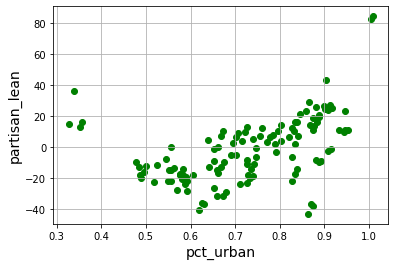

In [10]:
import matplotlib.pyplot as plt

plt.scatter(X_train['pct_urban'], X_train['partisan_lean'], color='green')
#plt.title('rep_event_count Vs margin_of_victory', fontsize=14)
plt.xlabel('pct_urban', fontsize=14)
plt.ylabel('partisan_lean', fontsize=14)
plt.grid(True)
plt.show()

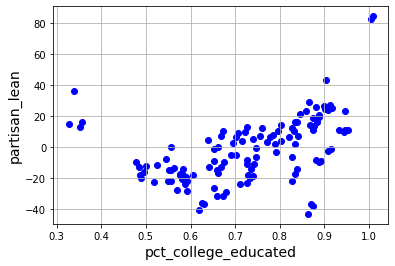

In [11]:
plt.scatter(X_train['pct_urban'], X_train['partisan_lean'], color='blue')
#plt.title('rep_event_count Vs margin_of_victory', fontsize=14)
plt.xlabel('pct_college_educated', fontsize=14)
plt.ylabel('partisan_lean', fontsize=14)
plt.grid(True)
plt.show()

In [22]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train[['partisan_lean','pct_urban','pct_college_educated','pct_reg_under45','pct_reg_black','pct_reg_hispanic']], Y_train['margin'])

LinearRegression()

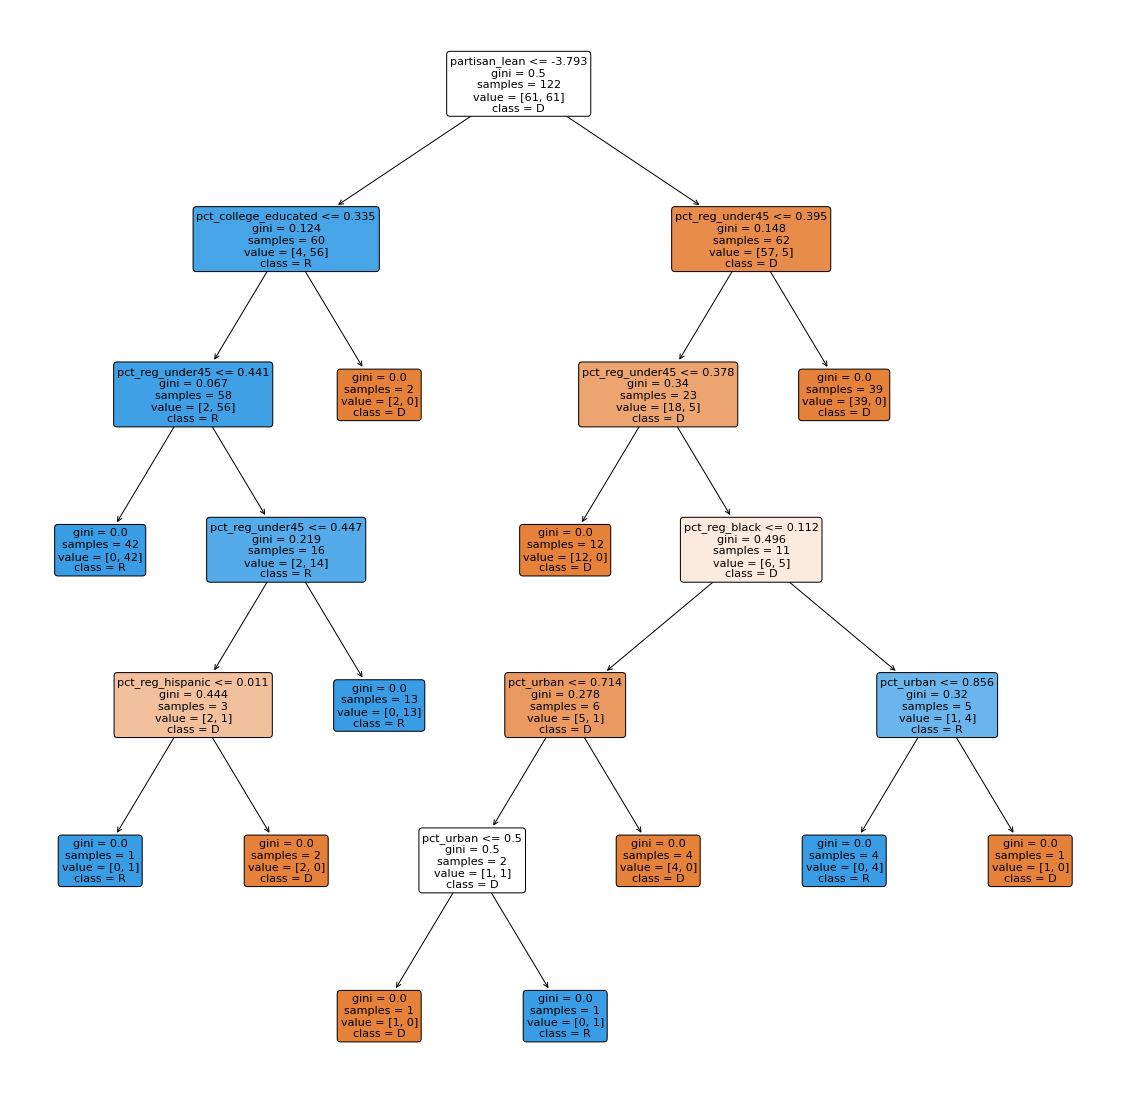

In [23]:
##Decision Tree Block

Y_train.loc[Y_train['margin'] > 0, 'result'] = 'D'
Y_train.loc[Y_train['margin'] <= 0, 'result'] = 'R'

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size

from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train[['partisan_lean','pct_urban','pct_college_educated','pct_reg_under45','pct_reg_black','pct_reg_hispanic']], Y_train['result'])

import numpy as np
sorted_labels = Y_train['result'].unique()
sorted_labels = np.sort(sorted_labels)
sorted_labels = list(map(str, sorted_labels))
sorted_labels


x = tree.plot_tree(clf,rounded=True,filled=True,class_names=sorted_labels,feature_names=['partisan_lean','pct_urban','pct_college_educated','pct_reg_under45','pct_reg_black','pct_reg_hispanic']) 

plt.savefig('images/tree_v2.png')

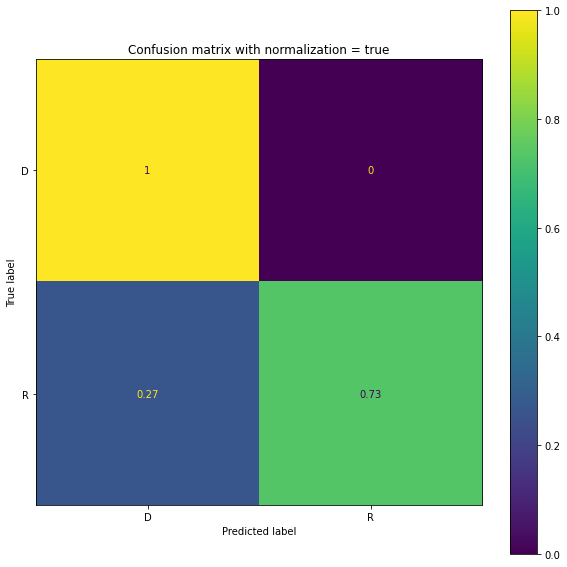

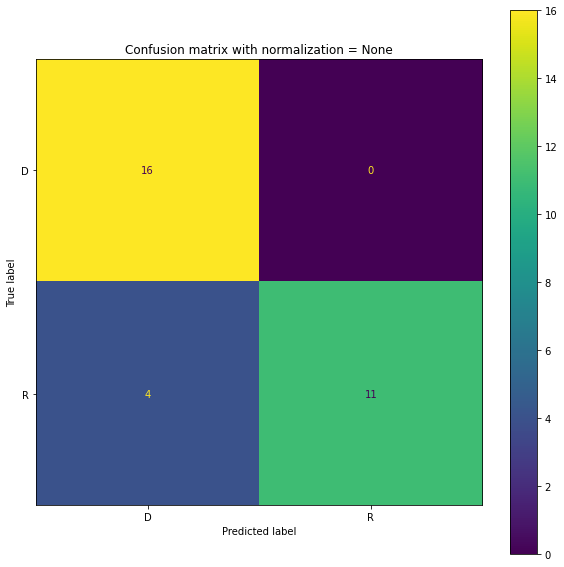

In [24]:
#setup plots for confusion matrix
from sklearn.metrics import plot_confusion_matrix as matrix
figSize = plt.rcParams["figure.figsize"]
figSize[0] = 10
figSize[1] = 10
plt.rcParams["figure.figsize"]=figSize

Y_test.loc[Y_test['margin'] > 0, 'result'] = 'D'
Y_test.loc[Y_test['margin'] <= 0, 'result'] = 'R'
#plot the confusion matrices 1 for normalzied the other un-normalized
values = ['true',None]
#cmap='cividis'
for x in values:
    disp = matrix(clf,X_test[['partisan_lean','pct_urban','pct_college_educated','pct_reg_under45','pct_reg_black','pct_reg_hispanic']],Y_test['result'],display_labels=sorted_labels,normalize=x)
    disp.ax_.set_title("Confusion matrix with normalization = "+ str(x))
    plt.savefig('images/confusion-normalize-' + str(x) + '.png')



In [26]:
years = [2008, 2012]
parties = ['democrat', 'republican']

lean_2020 = results_df[results_df.year.isin(years)]
#MN democrat party is officially called Minnesota Democratic–Farmer–Labor Party 
#https://en.wikipedia.org/wiki/Minnesota_Democratic%E2%80%93Farmer%E2%80%93Labor_Party
lean_2020 = lean_2020.replace({'party' : 'democratic-farmer-labor'},'democrat') 
lean_2020 = lean_2020[lean_2020.party.isin(parties)]

lean_2020['vote_share'] = round(100 * (lean_2020['candidatevotes']/lean_2020['totalvotes']),2) 
lean_2020 = lean_2020[lean_2020['vote_share'] > 1]  #Few electors voted for Kasich/Sanders
lean_2020 = lean_2020.filter(items = ['year','state_po','party','vote_share'])

lean_2020 = lean_2020.set_index(['year','state_po','party'],verify_integrity=True)

lean_2020 = lean_2020.unstack(level='party')
lean_2020['partisan_lean'] = lean_2020['vote_share']['democrat'] - lean_2020['vote_share']['republican'] 

lean_2020 = lean_2020.groupby('state_po')['partisan_lean'].mean().to_frame()
lean_2020.sort_values(by=['partisan_lean'])
lean_2020['year']  = 2020

lean_2020

urban_rural_pop_2020 = urban_rural_pop_2010
urban_rural_pop_2020 = urban_rural_pop_2020.drop(['total_population','urban_population'],axis=1)
urban_rural_pop_2020 = urban_rural_pop_2020["pct_urban"] + 0.0089
urban_rural_pop_2020 = urban_rural_pop_2020.to_frame()
urban_rural_pop_2020['year'] = 2020

urban_rural_pop_2020 = urban_rural_pop_2020.reset_index()
urban_rural_pop_2020 = urban_rural_pop_2020.set_index(['state_po','year'])

urban_rural_pop_2020

## 2019 (use for 2020 election)
acs_education_2020 = pd.read_csv('data/acs_2019_education_survey.csv')


acs_education_2020 = acs_education_2020.filter(items = ['NAME',
                                                        'S1501_C01_006E', #pop 25+
                                                        'S1501_C01_012E', #bachelors degree 25+
                                                        'S1501_C01_013E']) #grad degree 25+

acs_education_2020 = acs_education_2020.drop(0,axis=0)

acs_education_2020 = acs_education_2020.rename(columns={"NAME" : "state",
                                                  "S1501_C01_006E": "pop_25_plus",
                                                  "S1501_C01_012E": "pop_25_plus_bachelors",
                                                  "S1501_C01_013E": "pop_25_plus_graduate"})


acs_education_2020 = acs_education_2020.astype({'pop_25_plus' : 'int32',
                                                  'pop_25_plus_bachelors' : 'int32',
                                                  'pop_25_plus_graduate' : 'int32'})



acs_education_2020['college_educated_pop'] = acs_education_2020['pop_25_plus_bachelors'] + acs_education_2020['pop_25_plus_graduate']

acs_education_2020['pct_college_educated'] = acs_education_2020['college_educated_pop'] / acs_education_2020['pop_25_plus']

acs_education_2020 = acs_education_2020[acs_education_2020.state != 'Puerto Rico'] # :(

acs_education_2020 = acs_education_2020.set_index('state')
acs_education_2020 = acs_education_2020.join(states) 
acs_education_2020 = acs_education_2020.set_index('state_po')
acs_education_2020 = acs_education_2020.reset_index()

acs_education_2020['year'] = 2020 #using 2015 data for 2016 results
acs_education_2020 = acs_education_2020.drop(['pop_25_plus','pop_25_plus_bachelors','pop_25_plus_graduate','college_educated_pop'], axis=1)
acs_education_2020 = acs_education_2020.set_index(['state_po','year'])
acs_education_2020


urban_rural_pop_2020

,,pct_urban
state_po,year,
AL,2020,0.592376
AK,2020,0.605019
AZ,2020,0.893232
AR,2020,0.556332
CA,2020,0.945641
CO,2020,0.839931
CT,2020,0.888360
DE,2020,0.844385
DC,2020,1.008900


In [41]:
predict_data_set = lean_2020.join(urban_rural_pop_2020)
predict_data_set = predict_data_set.join(acs_education_2020)
predict_data_set = predict_data_set.join(age_race_2020)

outcome = []

for index, row in predict_data_set.iterrows():
    sample = np.array([row['partisan_lean'],row['pct_urban'],row['pct_college_educated'],row['pct_reg_under45'],row['pct_reg_black'],row['pct_reg_hispanic']]).reshape(1,-1)
    margin = regr.predict(sample)
    outcome.append({'State': str(index[0]), 'Exp_Margin':str(margin[0])})
    #print("Democrat margin for state " + str(index[0]) + " expected to be " + str(margin[0]))
    
outcome_df = pd.DataFrame(outcome)
outcome_df = outcome_df.set_index(['State'])

outcome_df

,Exp_Margin
State,
AL,-22.65819013525715
AK,-14.866061222146165
AZ,-6.13806171848632
AR,-23.69313986808617
CA,27.954068378934778
CO,13.656120230875835
CT,19.710565464168376
DE,18.682810795310978
DC,95.01074521645492


In [73]:
results_2020 = pd.read_csv('data/2020_results_AP_asof20201111.csv')
results_2020 = results_2020.set_index(['State'])
results_2020 = results_2020.join(outcome_df)

results_2020['Margin'] = pd.to_numeric(results_2020['Margin'])
results_2020['Exp_Margin'] = pd.to_numeric(results_2020['Exp_Margin'])

cond_win = [(results_2020['Margin'] < 0), (results_2020['Margin'] > 0)]
cond_expwin = [(results_2020['Exp_Margin'] < 0), (results_2020['Exp_Margin'] > 0)]

winner = ['REP', 'DEM']

results_2020['Win'] = np.select(cond_win, winner)
results_2020['Exp_Win'] = np.select(cond_expwin, winner)

#dem_elec = results_2020.loc[results_2020['Win'] == "DEM",['Elec_Votes']].sum()
dem_elec_exp = results_2020.loc[results_2020['Exp_Win'] == "DEM",['Elec_Votes']].sum()
rep_elec_exp = results_2020.loc[results_2020['Exp_Win'] == "REP",['Elec_Votes']].sum()
#dem_elec_exp['Elec_Votes']
#rep_elec_exp['Elec_Votes']


if dem_elec_exp['Elec_Votes'] >= 270:
    print("Projected winner is Joe Biden")
elif dem_elec_exp['Elec_Votes'] < 270:
    print("Projected winner is Donald Trump")

#results_2020['Win'] = np.where(results_2020['Margin'] < 0, "REP","DEM")
#results_2020['Exp_Win'] = np.where(results_2020['Exp_Margin'] < 0, "REP","DEM")

#results_2020

Projected winner is Joe Biden


In [78]:
wrong_pred = results_2020[results_2020.Win != results_2020.Exp_Win]

wrong_pred

,Elec_Votes,Pct_Dem,Pct_Rep,Margin,Exp_Margin,Win,Exp_Win
State,,,,,,,
AZ,11,49.4,49.1,0.3,-6.138062,DEM,REP
FL,29,47.9,51.2,-3.3,0.409014,REP,DEM
GA,16,49.5,49.2,0.3,-4.697625,DEM,REP
IA,6,45.0,53.2,-8.2,5.948042,REP,DEM
OH,18,45.2,53.4,-8.2,2.883810,REP,DEM
